In [30]:
# Pandas project: Global Shark Attack Incidents:

In [ ]:
'''

Main goal:

As a biologist, my goal with this project is to demonstrate that sharks are adorable creatures (Baby Shark doo doo doo...)
and that humans seek to be eaten by them for some strange reasons.

My hypotheses:
- Humans do some weird stuff (activities) to make it easier for sharks to locate them.
- 
- 

'''

In [32]:
# First, I import the packages I need:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [33]:
# I import the dataframe using Pandas with the correct encoding and I take a first look at the data:
df = pd.read_csv('./Input/GSAF5.csv', encoding = 'ISO-8859-1')
display(df.head(3))

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN


In [34]:
# Variables I can play with:
print([e for e in df.columns])

['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']


In [35]:
# I delete columns that I will not need in my analysis:
df = df.drop(['Area','Location','Injury','Time','Investigator or Source','pdf','href formula','href'], axis=1)
display(df.head(3))

,Case Number,Date,Year,Type,Country,Activity,Name,Sex,Age,Fatal (Y/N),Species,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Surfing,male,M,16,N,NaN,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Surfing,Chucky Luciano,M,36,N,NaN,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Surfing,male,M,43,N,NaN,2016.09.18.a,2016.09.18.a,5991,NaN,NaN


In [36]:
# Why are there three different Case Numbers? Are they really different?

# Comparing Case Number and Case Number.1:
comparing = []
for i in range(len(df['Case Number'])):
    if df['Case Number'][i] == df['Case Number.1'][i]:
        comparing.append(True)
    else:
        comparing.append(False)

# Different values:
falsevalues = [i for i, x in enumerate(comparing) if not x]
print('Case Number:',*[df['Case Number'][e] for e in falsevalues])
print('Case Number.1:',*[df['Case Number.1'][e] for e in falsevalues])

# Comparing Case Number and Case Number.2:
comparing_2 = []
for i in range(len(df['Case Number'])):
    if df['Case Number'][i] == df['Case Number.2'][i]:
        comparing_2.append(True)
    else:
        comparing_2.append(False)

# Different values:
falsevalues2 = [i for i, x in enumerate(comparing_2) if not x]
print('\nCase Number:',*[df['Case Number'][e] for e in falsevalues2])
print('Case Number.2:',*[df['Case Number.2'][e] for e in falsevalues2])

# Values that differ seem to be typographical errors. I can delete Case Number.1 and Case Number.2.


Case Number: 2016.09.15 2016.07.14.4 2016.01.24.b 2015.12.23 2015.10.28.a 2015.07-10 1967.07.05 1962,08.30.b 1961.09.02.R 1952.08.05 1934.01.08.R 1900.00.00.R 1911.07.31.R
Case Number.1: 2016.09.16 2016.07.14.R 2015.01.24.b 2015.11.07 2015.10.28 2015.07.10 1967/07.05 1962.08.30.b 1961.09,06.R 1952.08.04 1934.02.08.R 1919.00.00.R 1911.07.31.T

Case Number: 2015.07-10 1934.01.08.R
Case Number.2: 2015.07.10 1934.02.08.R


In [37]:
# In fact, none of the three columns would be valid as a 'primary key' since they contain repeated values:
print('Case Number:',len(set(df['Case Number'])),'unique values out of',len(df['Case Number']))
print('Case Number.1:',len(set(df['Case Number.1'])),'unique values out of',len(df['Case Number.1']))
print('Case Number.2:',len(set(df['Case Number.2'])),'unique values out of',len(df['Case Number.2']))

# The same goes for column 'original order':
print('Case Number:',len(set(df['original order'])),'unique values out of',len(df['original order']))


Case Number: 5976 unique values out of 5992
Case Number.1: 5975 unique values out of 5992
Case Number.2: 5976 unique values out of 5992
Case Number: 5988 unique values out of 5992


In [38]:
# Consequently, I delete those four columns and I will create a correct Case Number later (using df.apply):
df = df.drop(['Case Number','Case Number.1','Case Number.2','original order'], axis=1)
display(df.head(3))

,Date,Year,Type,Country,Activity,Name,Sex,Age,Fatal (Y/N),Species,Unnamed: 22,Unnamed: 23
0,18-Sep-16,2016,Unprovoked,USA,Surfing,male,M,16,N,NaN,NaN,NaN
1,18-Sep-16,2016,Unprovoked,USA,Surfing,Chucky Luciano,M,36,N,NaN,NaN,NaN
2,18-Sep-16,2016,Unprovoked,USA,Surfing,male,M,43,N,NaN,NaN,NaN


In [39]:
# Evaluating missing values:
null_cols = df.isnull().sum()
print(null_cols[null_cols > 0])
print('Total rows in the datataset:',df.shape[0])
# Some columns have relatively few null values while others have thousands of nulls.

Country          43
Activity        527
Name            200
Sex             567
Age            2681
Fatal (Y/N)      19
Species        2934
Unnamed: 22    5991
Unnamed: 23    5990
dtype: int64
Total rows in the datataset: 5992


In [40]:
# What's going on with 'Unnamed: 22' and 'Unnamed: 23'?

# Most of their values are null and we don't have any information about their content.
# I can drop them:
drop_cols = list(null_cols[null_cols > 5000].index)
df = df.drop(drop_cols, axis=1)

In [41]:
# Variables I can play with at this point:
print([e for e in df.columns])

['Date', 'Year', 'Type', 'Country', 'Activity', 'Name', 'Sex ', 'Age', 'Fatal (Y/N)', 'Species ']


In [42]:
# Renaming columns with unhelpful names:
df = df.rename(columns={'Fatal (Y/N)': 'Fatal'})
df = df.rename(columns={'Sex ': 'Sex'})
df = df.rename(columns={'Species ': 'Species'})
print([e for e in df.columns])

['Date', 'Year', 'Type', 'Country', 'Activity', 'Name', 'Sex', 'Age', 'Fatal', 'Species']


In [43]:
# Are data types correct?
print(df.dtypes)

Date        object
Year         int64
Type        object
Country     object
Activity    object
Name        object
Sex         object
Age         object
Fatal       object
Species     object
dtype: object


In [ ]:
'''
Keep in mind that if a column contains null values, it cannot take any type:

https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html
NA type promotions
When introducing NAs into an existing Series or DataFrame via reindex() or some other means, boolean and integer types
will be promoted to a different dtype in order to store the NAs. The promotions are summarized in this table:
Typeclass / Promotion dtype for storing NAs
floating / no change
object / no change
integer / cast to float64
boolean / cast to object
'''

In [45]:
# Examples:

# 'Age' must be an integer but it have to be cleaned first.
# However, since it contains NaN values, I will be converted it into a float.
set(df['Age'])

# Fatal (once cleaned) could be a boolean but it contains NaN values, so it has to be an object.
set(df['Fatal'])

In [46]:
# Let's clean up the dataframe!

# Fatal column:
df['Fatal'] = [re.sub('N\s|\sN', 'N', str(e)) for e in df['Fatal']]
df['Fatal'] = [re.sub('F', 'Y', str(e)) for e in df['Fatal']]
df['Fatal'] = [re.sub('UNKNOWN|#VALUE!', str(np.nan), str(e)) for e in df['Fatal']]
df['Fatal'] = [re.sub('n', 'N', str(e)) for e in df['Fatal']]
print(set(df['Fatal']))


{'NaN', 'Y', 'N'}


In [48]:
df['Fatal'].replace({'NaN': np.nan}, inplace=True)
print(set(df.Fatal))
print(df.Fatal.dtypes)

{nan, 'Y', 'N'}
object


In [49]:
# Date column:

# I'm going to extract 'month' information:
# Months are stored before a dash.
lista_date = [re.findall("(?i)[a-z]+-", str(e)) for e in df['Date']]

lista_date_2 = []
for e in lista_date:
    if len(e)>0:
        lista_date_2.append(e[0][:-1])
    else:
        lista_date_2.append('NaN')

lista_date_2 = [re.sub('Sept', 'Sep', str(e)) for e in lista_date_2]
lista_date_2 = [re.sub('March', 'Mar', str(e)) for e in lista_date_2]
lista_date_2 = [re.sub('Ap$', 'Apr', str(e)) for e in lista_date_2]
lista_date_2 = [re.sub('(?i)mid|Summer|Spanish|Jut', 'NaN', str(e)) for e in lista_date_2]

df['Month'] = lista_date_2
df['Month'].replace({'NaN': np.nan}, inplace=True)
print(set(df.Month))
display(df.head(3))

{nan, 'Jun', 'Apr', 'Feb', 'Jan', 'Dec', 'Mar', 'Sep', 'May', 'Jul', 'Oct', 'Aug', 'Nov'}


,Date,Year,Type,Country,Activity,Name,Sex,Age,Fatal,Species,Month
0,18-Sep-16,2016,Unprovoked,USA,Surfing,male,M,16,N,NaN,Sep
1,18-Sep-16,2016,Unprovoked,USA,Surfing,Chucky Luciano,M,36,N,NaN,Sep
2,18-Sep-16,2016,Unprovoked,USA,Surfing,male,M,43,N,NaN,Sep


Jul    635
Aug    579
Sep    523
Jan    500
Jun    473
Dec    417
Oct    411
Apr    407
Mar    401
Nov    397
May    369
Feb    360
Name: Month, dtype: int64


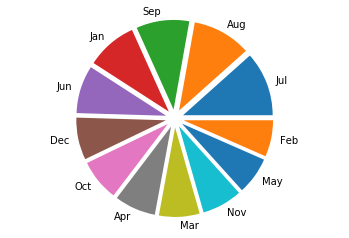

In [62]:
print(df['Month'].value_counts())
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie([e for e in df['Month'].value_counts()], explode = explode, labels=['Jul','Aug','Sep','Jan','Jun','Dec','Oct','Apr','Mar','Nov','May','Feb'])
plt.axis('equal')
plt.show()

In [50]:
# Year column:

# Completing 'Year' variable with 'Date' variable ('Date' contains some years that are not collected in 'Year' column):

lista_year = [re.findall("[0-9]{4}", str(e)) for e in df['Date']]

lista_year_2 = []
for e in lista_year:
    if len(e)==1:
        lista_year_2.append(int(e[0]))
    else:
        lista_year_2.append(None)

print(list(df['Year']).count(0), "rows equal 0 before the completion")

for i in range(len(lista_year_2)):
    if lista_year_2[i] != None:
        if df['Year'][i] == 0:
            # df['Year'][i] = lista_year_2[i] # SettingWithCopyWarning: A value is trying to be set on a copy
            # of a slice from a DataFrame
            df.at[i,'Year'] = lista_year_2[i]

print(list(df['Year']).count(0), "rows equal 0 after the completion")


124 rows equal 0 before the completion
33 rows equal 0 after the completion


In [52]:
# Values below 1000 in the Year variable do not seem very reliable. I convert them to NaN values:

setyear = set(df['Year'][df['Year']<1000])
for e in setyear:
    df['Year'].replace({e: np.nan}, inplace=True)

# Because NaN is a float, this forces an array of integers with any missing values to become floating point.
# https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html
# If you need to represent integers with possibly missing values, you can use one of the nullable-integer extension dtypes
# provided by pandas.

# However, I'm going to keep the float type because this is not going to pose any problem in my analysis.
# (there is no need to converti it to int).

print(df.Year.dtypes)

float64


In [53]:
# I won't need 'Date' column anymore:
df = df.drop(['Date'], axis=1)
display(df.head(3))

,Year,Type,Country,Activity,Name,Sex,Age,Fatal,Species,Month
0,2016.0,Unprovoked,USA,Surfing,male,M,16,N,NaN,Sep
1,2016.0,Unprovoked,USA,Surfing,Chucky Luciano,M,36,N,NaN,Sep
2,2016.0,Unprovoked,USA,Surfing,male,M,43,N,NaN,Sep


In [54]:
# Binning 'Year' to create a new variable: 'Century':

# print(df['Year'].min()) # 1543.0
# print(df['Year'].max()) # 2016.0

year_labels = ['XVI','XVII','XVIII','XIX','XX','XXI']
cutoffs = [1499,1599,1699,1799,1899,1999,2099]
century = pd.cut(df['Year'], cutoffs, labels=year_labels)

df['Century'] = century
display(df.head(3))

,Year,Type,Country,Activity,Name,Sex,Age,Fatal,Species,Month,Century
0,2016.0,Unprovoked,USA,Surfing,male,M,16,N,NaN,Sep,XXI
1,2016.0,Unprovoked,USA,Surfing,Chucky Luciano,M,36,N,NaN,Sep,XXI
2,2016.0,Unprovoked,USA,Surfing,male,M,43,N,NaN,Sep,XXI


XX       3545
XXI      1868
XIX       511
XVIII      22
XVII        5
XVI         5
Name: Century, dtype: int64


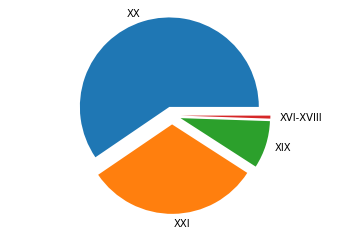

In [59]:
# https://pythonspot.com/matplotlib-pie-chart/
# https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

print(df['Century'].value_counts())
century_value_counts = [e for e in df['Century'].value_counts()]
century_value_counts_grouped = [century_value_counts[0],century_value_counts[1],century_value_counts[2],century_value_counts[3]+century_value_counts[4]+century_value_counts[5]]

# colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1)
plt.pie(century_value_counts_grouped, explode=explode, labels=['XX','XXI','XIX','XVI-XVIII'])
plt.axis('equal')
plt.show()

In [145]:
# Activity column:

# print(set(df3['Activity']))

# lista_activity = [re.findall("[A-Z][a-z]+ing", str(e)) for e in df3['Activity']] 
lista_activity = [re.findall("(?i)[a-z]+ing", str(e)) for e in df3['Activity']] 
# print(lista_activity)

lista_activity_2 = []
for e in lista_activity:
    if len(e)>0:
        lista_activity_2.append(e[0])
    else:
        lista_activity_2.append(None)
# print(lista_activity_2)
# print(set(lista_activity_2))

In [146]:
lista_activity_2 = [e.capitalize() if e != None else None for e in lista_activity_2]
print(lista_activity_2)

['Surfing', 'Surfing', 'Surfing', 'Surfing', 'Surfing', 'Fishing', 'Wading', 'Swimming', 'Surfing', 'Boarding', 'Surfing', 'Boarding', 'Spearfishing', 'Surfing', 'Surfing', 'Surfing', 'Wading', 'Snorkeling', 'Boarding', 'Surfing', 'Swimming', 'Swimming', 'Kayaking', 'Lobstering', 'Surfing', 'Surfing', 'Surfing', 'Spearfishing', 'Fishing', 'Fishing', 'Surfing', None, 'Swimming', 'Diving', 'Wading', 'Fishing', 'Fishing', 'Fishing', 'Swimming', 'Fishing', None, 'Surfing', 'Diving', 'Spearfishing', 'Floating', 'Wading', 'Surfing', 'Spearfishing', 'Floating', 'Standing', 'Surfing', 'Swimming', 'Diving', 'Swimming', 'Spearfishing', 'Surfing', 'Surfing', 'Swimming', 'Swimming', 'Swimming', 'Swimming', 'Swimming', 'Swimming', 'Teasing', 'Floating', 'Fishing', 'Surfing', 'Surfing', 'Skiing', 'Swimming', 'Spearfishing', 'Spearfishing', 'Walking', None, 'Fishing', None, 'Snorkeling', 'Surfing', None, 'Surfing', None, 'Surfing', 'Surfing', 'Diving', None, 'Fishing', 'Swimming', 'Surfing', 'Spearfi

In [147]:
lista_aux = []
for e in set(lista_activity_2):
    lista_aux.append((e, lista_activity_2.count(e)))
# print(lista_aux)
lista_aux.sort(key=lambda tup: tup[1], reverse=True)
# print(lista_aux) 

# I'm going to make an "Others" category for those activities with an occurrence < 10:

activities = [e for e in lista_aux if e[1]> 10]
print(activities)

activities2 = [e[0] for e in lista_aux if e[1]> 10]
print(activities2)

[('Swimming', 1047), ('Surfing', 1013), (None, 894), ('Fishing', 687), ('Diving', 509), ('Spearfishing', 395), ('Bathing', 177), ('Wading', 162), ('Standing', 128), ('Boarding', 127), ('Snorkeling', 82), ('Floating', 46), ('Treading', 39), ('Kayaking', 35), ('Skiing', 34), ('Attempting', 30), ('Playing', 25), ('Walking', 24), ('Sitting', 21), ('Rowing', 21), ('Windsurfing', 20), ('Paddling', 16), ('Freediving', 14), ('Sinking', 14), ('Canoeing', 13), ('Sailing', 13), ('Collecting', 12), ('Netting', 11), ('Skindiving', 11), ('Washing', 11)]
['Swimming', 'Surfing', None, 'Fishing', 'Diving', 'Spearfishing', 'Bathing', 'Wading', 'Standing', 'Boarding', 'Snorkeling', 'Floating', 'Treading', 'Kayaking', 'Skiing', 'Attempting', 'Playing', 'Walking', 'Sitting', 'Rowing', 'Windsurfing', 'Paddling', 'Freediving', 'Sinking', 'Canoeing', 'Sailing', 'Collecting', 'Netting', 'Skindiving', 'Washing']


In [148]:
lista_activity_3 = ['Others' if e not in activities2 else e for e in lista_activity_2]
print(set(lista_activity_3))

{'Freediving', 'Netting', 'Sailing', 'Boarding', 'Spearfishing', 'Attempting', 'Washing', 'Kayaking', 'Skiing', 'Standing', 'Bathing', 'Rowing', 'Treading', 'Skindiving', 'Swimming', 'Windsurfing', 'Collecting', 'Surfing', 'Sitting', 'Canoeing', 'Walking', None, 'Paddling', 'Others', 'Diving', 'Snorkeling', 'Fishing', 'Sinking', 'Floating', 'Playing', 'Wading'}


In [149]:
lista_activity_3 = [re.sub('Canoeing|Rowing|Kayaking', 'Paddling', str(e)) if e != None else None for e in lista_activity_3]
lista_activity_3 = [re.sub('Bathing|Floating|Treading', 'Swimming', str(e)) if e != None else None for e in lista_activity_3]
lista_activity_3 = [re.sub('Snorkeling|Skindiving', 'Freediving', str(e)) if e != None else None for e in lista_activity_3]
lista_activity_3 = [re.sub('Wading|Walking','Standing', str(e)) if e != None else None for e in lista_activity_3]
lista_activity_3 = [re.sub('Netting','Fishing', str(e)) if e != None else None for e in lista_activity_3]

In [150]:
print(set(lista_activity_3))

{'Freediving', 'Sailing', 'Boarding', 'Spearfishing', 'Attempting', 'Washing', 'Skiing', 'Standing', 'Swimming', 'Windsurfing', 'Collecting', 'Surfing', 'Sitting', None, 'Paddling', 'Others', 'Diving', 'Fishing', 'Sinking', 'Playing'}


In [151]:
[re.findall("(?i)Attempting", str(e)) for e in df3['Activity']]
[re.findall("(?i)\w+\sBoarding", str(e)) for e in df3['Activity']]
[re.findall("(?i)Playing", str(e)) for e in df3['Activity']]
[re.findall("(?i)Sitting", str(e)) for e in df3['Activity']]
[re.findall("(?i)Collecting", str(e)) for e in df3['Activity']]
[re.findall("(?i)Washing", str(e)) for e in df3['Activity']]


[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


In [152]:
lista_aux_2 = []
for i in range(len(lista_activity_2)):
    if lista_activity_2[i] == None and df3['Activity'].isnull()[i] == False:
        lista_aux_2.append(df3['Activity'][i])
    else:
        lista_aux_2.append('Ignore')
# print(set(lista_aux_2))

lista_aux_2 = [e.capitalize() for e in lista_aux_2]

lista_aux_3 = []
for e in set(lista_aux_2):
    lista_aux_3.append((e, lista_aux_2.count(e)))
# print(lista_aux_3)
lista_aux_3.sort(key=lambda tup: tup[1], reverse=True)
print(lista_aux_3)


[('Ignore', 5625), ('Fell overboard', 21), ('Sea disaster', 14), ('Fell into the water', 8), ('Murder', 6), ('Boat', 5), ('Shipwreck', 5), ('Jumped into the water', 4), ('Boat capsized', 4), ('Air disaster', 4), ('Jumped overboard', 3), ('Boat swamped', 3), ('Wreck of the schooner pohoiki ', 3), ('Unknown', 3), ('.', 3), ('Jumped overboard ', 2), ('Suicide', 2), ('Knocked overboard', 2), ('Aircraft crashed into sea', 2), ('Hmas parramatta torpedoed & sunk by the u-559', 2), ('Thrown overboard', 2), ('U.s. airforce c124 enroute from hickham air base to japan went down. the 3 survivors fashioned raft from mailbags  & were rescued 3 days after the crash.', 2), ('Dived for a coin', 2), ('Wreck of the state oil company ship permina', 1), ('Fell or jumped overboard from the liner rhynland', 1), ('Wreck of the union steamship company 982-ton iron steamer kafir', 1), ('Grabbed shark & threw it on deck', 1), ('On 6-nov-1942, the german submarine u-68 sank the city of cairo 5 days from cape town

In [153]:
addingactivities = [e for e in lista_aux_3 if e[1]> 5]
print(addingactivities)

addingactivities2 = [e[0] for e in lista_aux_3 if e[1]> 5]
print(addingactivities2)

for i in range(len(df3['Activity'])):
    if df3['Activity'][i] == 'Fell overboard' or df3['Activity'][i] == 'Sea disaster' or df3['Activity'][i] == 'Fell into the water':
        lista_activity_3[i] = 'Sinking'
        
for i in range(len(df3['Activity'])):
    if df3['Activity'][i] == 'Murder':
        lista_activity_3[i] = 'Murder'

[('Ignore', 5625), ('Fell overboard', 21), ('Sea disaster', 14), ('Fell into the water', 8), ('Murder', 6)]
['Ignore', 'Fell overboard', 'Sea disaster', 'Fell into the water', 'Murder']


In [154]:
print(set(lista_activity_3))

{'Freediving', 'Sailing', 'Boarding', 'Spearfishing', 'Attempting', 'Murder', 'Washing', 'Skiing', 'Standing', 'Swimming', 'Windsurfing', 'Collecting', 'Surfing', 'Sitting', None, 'Paddling', 'Others', 'Diving', 'Fishing', 'Sinking', 'Playing'}


In [155]:
df3['ActivityNew'] = lista_activity_3
df3['ActivityNew'].value_counts()

Swimming        1309
Surfing         1013
Fishing          698
Diving           509
Spearfishing     395
Others           361
Standing         314
Boarding         127
Freediving       107
Paddling          85
Sinking           51
Skiing            34
Attempting        30
Playing           25
Sitting           21
Windsurfing       20
Sailing           13
Washing           11
Murder             6
Name: ActivityNew, dtype: int64

In [156]:
# La columna nombre es irrelevante de cara al análisis, pero, en coasiones, contiene información sobre el sexo de la
# persona atacada

# df[df['Name'] == 'male']
# df[df['Name'] == 'female']

df3 = df3.rename(columns={"Sex ": "Sex"})
set(df3['Sex'])

{'.', 'F', 'M', 'M ', 'N', 'lli', nan}

In [157]:
df3['Sex'] = [re.sub('M\s', 'M', str(e)) for e in df3['Sex']]
df3['Sex'] = [re.sub('N|\.|lli', 'nan', str(e)) for e in df3['Sex']]
set(df3['Sex'])

{'F', 'M', 'nan'}

In [158]:
df3['Sex'].replace({'nan': np.nan}, inplace=True)
set(df3['Sex'])

{'F', 'M', nan}

In [159]:
df3['Sex'].value_counts()

M    4837
F     585
Name: Sex, dtype: int64

In [160]:
print(set(df3['Type']))
df3['Type'].value_counts()

{'Sea Disaster', 'Unprovoked', 'Provoked', 'Invalid', 'Boat', 'Boating'}


Unprovoked      4386
Provoked         557
Invalid          519
Sea Disaster     220
Boat             200
Boating          110
Name: Type, dtype: int64

In [163]:
# Quitar espacios

# set(df3['Country'])

df3['Country'].value_counts()


USA                               2116
AUSTRALIA                         1279
SOUTH AFRICA                       565
PAPUA NEW GUINEA                   133
NEW ZEALAND                        125
BRAZIL                             102
BAHAMAS                             98
MEXICO                              81
ITALY                               71
FIJI                                62
PHILIPPINES                         59
REUNION                             57
NEW CALEDONIA                       51
MOZAMBIQUE                          44
CUBA                                42
SPAIN                               40
INDIA                               37
EGYPT                               36
CROATIA                             34
JAPAN                               32
PANAMA                              32
SOLOMON ISLANDS                     29
IRAN                                29
GREECE                              25
HONG KONG                           24
JAMAICA                  

In [ ]:
# Reiniciar el Kernel si modificamos una función, porque habrá que volver a importarla!

# Ordenar por alguna columna
#df["Year"].value_counts().sort_values()
#df["Year"].value_counts().sort_index()

# Uniones:
# df.loc[df['Transmission'].str.startswith('A'), 'TransType'] = 'Automatic'
# df.loc[df['Transmission'].str.startswith('M'), 'TransType'] = 'Manual'